In [1]:
from astropy.io import fits
from astropy.wcs import wcs
from reproject import reproject_interp
from astropy import units as u
from spectral_cube import SpectralCube
import pvextractor
from tqdm import tqdm

import numpy as np
from routine import CreateCube

In [23]:
c = 3*10**5 * u.km/u.s
Vsys = 243. * u.km/u.s
restwvl = 6583.45*u.AA * (Vsys + c)/c # NII
cube = SpectralCube.read('../ngc253/data/ADP.2018-11-22T21_29_46.157.fits', hdu=1).spectral_slab(6500*u.AA, 6700*u.AA)  
subcube = cube.with_spectral_unit(u.km/u.s, 'optical', restwvl)
subcube.write('../ngc253/data/NIIb_ADP.2018-11-22T21_29_46.157.fits', format='fits', overwrite=True)  

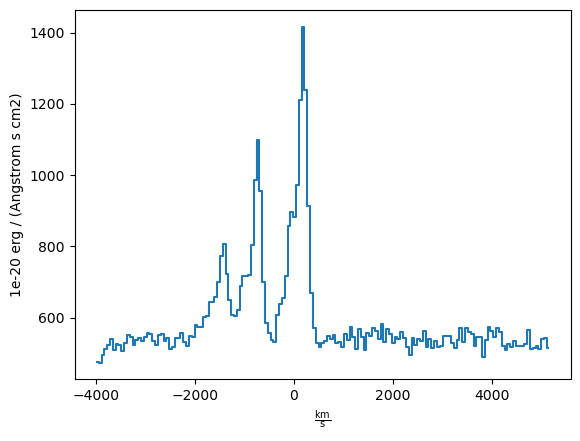

In [24]:
subcube[:,270,230].quicklook()

### Making H-beta and H-alpha cubes and taking the ratio of intensities.

In [2]:
c = 3*10**5 * u.km/u.s
Vsys = 243. * u.km/u.s

In [37]:
subcube.shape[2]

437

In [5]:
cube = CreateCube('../ngc253/muse/data/ADP.2018-11-22T21_29_46.157.fits', 
           4800, 5100, 4800, 4845, 4890, 4940)
restwvl = 4861.363*u.AA * (Vsys + c)/c # H-beta
subcube = cube.with_spectral_unit(u.km/u.s, 'optical', restwvl).spectral_slab(-600*u.km/u.s, 600*u.km/u.s)
subcube.write('../ngc253/muse/data/Hbeta_ADP.2018-11-22T21_29_46.157.fits', format='fits', overwrite=True)  
# hbeta = np.full((subcube.shape[1],subcube.shape[2]), np.nan)
# pbar = tqdm(total=subcube.shape[2]*subcube.shape[1])
# for i in np.arange(subcube.shape[2]): # x-axis
#     for j in np.arange(subcube.shape[1]): # y-axis
#         hbeta[j,i] = np.max(subcube[:,j,i]).value
#         pbar.update(1)



In [56]:
cube = CreateCube('../ngc253/muse/data/ADP.2018-11-22T21_29_46.157.fits', 
           6500, 6800, 6525, 6620, 6700, 6750)
restwvl = 6562.801*u.AA * (Vsys + c)/c # H-alpha
subcube = cube.spectral_slab(6555*u.AA, 6575*u.AA)  

halpha = np.full((subcube.shape[1],subcube.shape[2]), np.nan)
pbar = tqdm(total=subcube.shape[2]*subcube.shape[1])
for i in np.arange(subcube.shape[2]): # x-axis
    for j in np.arange(subcube.shape[1]): # y-axis
        halpha[j,i] = np.max(subcube[:,j,i]).value
        pbar.update(1)

100%|██████████████████████████████████████████████████████| 190532/190532 [05:40<00:00, 604.42it/s]

In [70]:
rat = hbeta/halpha
hdul = fits.PrimaryHDU(data=rat)
hdul.writeto('../ngc253/muse/data/hbeta_halpha_intens.fits', overwrite=True)  

In [74]:
np.mean(rat[np.isfinite(rat)])

0.12918552593245927